In [ ]:
# Unduh dataset
!wget --no-check-certificate \
http://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip\
 -O /tmp/household_power_consumption.zip

--2020-08-25 10:55:50--  http://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20640916 (20M) [application/x-httpd-php]
Saving to: ‘/tmp/household_power_consumption.zip’

/tmp/household_powe 100%[===================>]  19.68M  10.0MB/s    in 2.0s    

2020-08-25 10:55:52 (10.0 MB/s) - ‘/tmp/household_power_consumption.zip’ saved [20640916/20640916]



In [ ]:
# Ekstraksi file zip
import zipfile,os

local_zip = '/tmp/household_power_consumption.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Siapkan dataset
import pandas as pd

df = pd.read_csv('/tmp/household_power_consumption.txt',
                 sep=';', 
                 parse_dates={'dates' : ['Date', 'Time']},  # Gabung kolom 'Date' dan 'Time'   
                 infer_datetime_format=True, 
                 low_memory=False, 
                 na_values=['nan','?'],  # Konversi string 'nan' dan '?' ke data numpy nan
                 index_col='dates')  # Konversi dataset ke time-series type

In [ ]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dates,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
# Isi baris kosong/hilang 
import numpy as np

for column in df.columns:
    df[column].replace(0, np.nan, inplace=True)  # Isi dengan NAN
    df[column].fillna(method='ffill', inplace=True)  # Isi kembali dengan ffill method
    
df.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1            True
Sub_metering_2           False
Sub_metering_3           False
dtype: bool

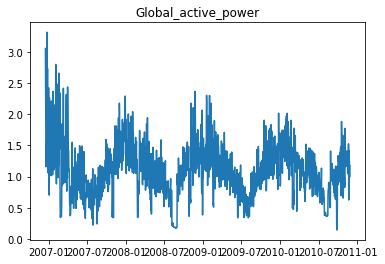

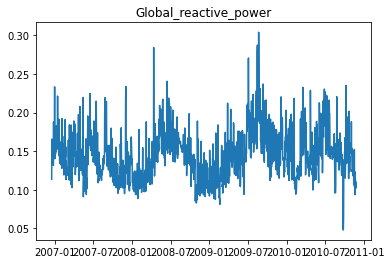

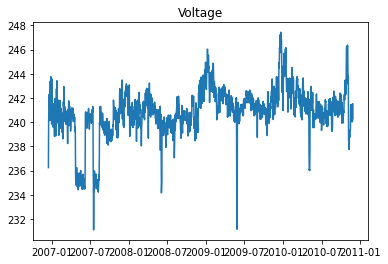

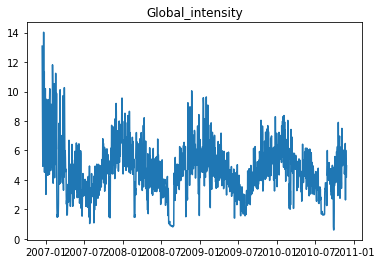

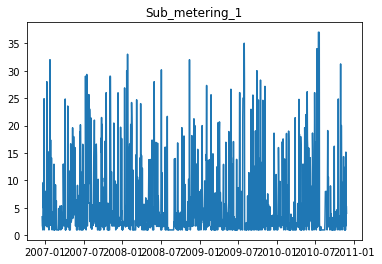

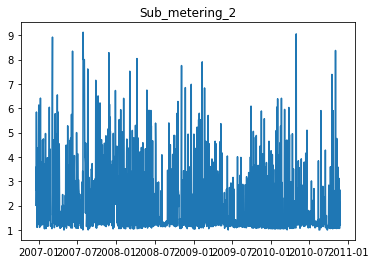

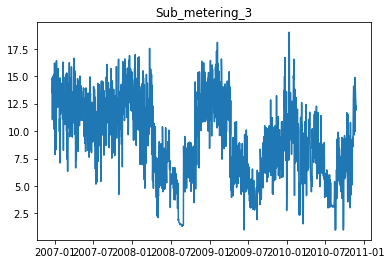

In [ ]:
# Buat plot 
import matplotlib.pyplot as plt

# Plot rata-rata data per hari
for column in df.columns:
    mean = df[column].resample('d').mean()
    plt.plot(mean)
    plt.title(column, loc='center')
    plt.show()

In [ ]:
df = df[['Global_active_power']]
df.tail()

,Global_active_power
dates,
2010-11-26 20:58:00,0.946
2010-11-26 20:59:00,0.944
2010-11-26 21:00:00,0.938
2010-11-26 21:01:00,0.934
2010-11-26 21:02:00,0.932


In [ ]:
df = df['2007-07-01 00:00:00':]  # Ambil data setelah tanggal 2007-07
df

,Global_active_power
dates,
2007-07-01 00:00:00,2.744
2007-07-01 00:01:00,2.672
2007-07-01 00:02:00,2.676
2007-07-01 00:03:00,2.680
2007-07-01 00:04:00,2.550
...,...
2010-11-26 20:58:00,0.946
2010-11-26 20:59:00,0.944
2010-11-26 21:00:00,0.938


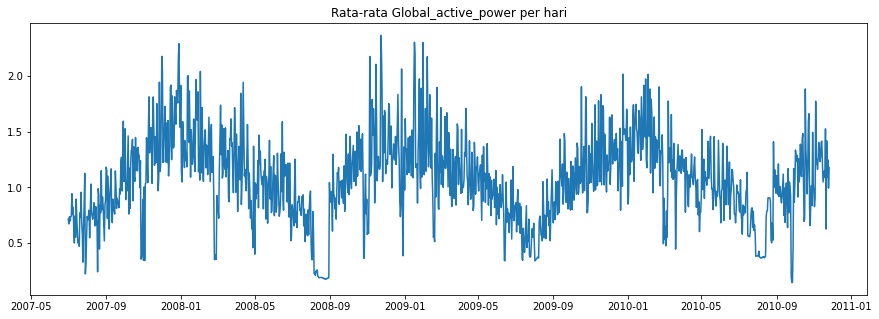

In [ ]:
plt.figure(figsize=(15, 5))
mean = df['Global_active_power'].resample('d').mean()
plt.plot(mean)
plt.title('Rata-rata Global_active_power per hari', loc='center')
plt.show()

In [ ]:
# Resample dataset selama satu jam
df_resample = df.resample('h').mean() 
print('per-menit: ', df.shape[0])
print('per-jam: ', df_resample.shape[0])

per-menit:  1792623
per-jam:  29878


In [ ]:
df_resample

,Global_active_power
dates,
2007-07-01 00:00:00,2.493733
2007-07-01 01:00:00,0.990900
2007-07-01 02:00:00,0.789900
2007-07-01 03:00:00,0.287467
2007-07-01 04:00:00,0.515533
...,...
2010-11-26 17:00:00,1.725900
2010-11-26 18:00:00,1.573467
2010-11-26 19:00:00,1.659333


In [ ]:
# Normalisasi data
from sklearn import preprocessing

values = df_resample.values.reshape(-1,1)
values = values.astype('float32')
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
values

array([[2.4937334],
       [0.9909   ],
       [0.7899   ],
       ...,
       [1.6593333],
       [1.1637   ],
       [0.9346667]], dtype=float32)

In [ ]:
scaled

array([[0.3681692 ],
       [0.1346843 ],
       [0.10345631],
       ...,
       [0.23853418],
       [0.16153105],
       [0.12594771]], dtype=float32)

In [ ]:
# Bagi train set dan test set
train_size = int(len(scaled) * 0.79)
val_size = int(len(scaled) * 0.2)
test_size = len(scaled) - train_size - val_size
train, val, test = scaled[0:train_size,:], scaled[train_size:-(test_size),:], scaled[-(test_size):,:]
print(f'train: {len(train)}')
print(f'validation: {len(val)}')
print(f'test: {len(test)}')

train: 23603
validation: 5975
test: 300


In [ ]:
from itertools import chain

train = np.array(list(chain.from_iterable(train)))
val = np.array(list(chain.from_iterable(val)))
test = np.array(list(chain.from_iterable(test)))

In [ ]:
train

array([0.3681692 , 0.1346843 , 0.10345631, ..., 0.29972655, 0.28574905,
       0.20226726], dtype=float32)

In [ ]:
# Bagi sekuen data menjadi sample
def split_sequence(sequence, n_steps):
	X, Y = list(), list()
	for i in range(len(sequence)):
        # Cari bagian akhir dari pola sekuen
		end_iX = i + n_steps
        # Jika loop sudah berada di akhir
		if end_iX > len(sequence)-1:
			break
		# Gabungkan bagian input dan output dari pola sekuen
		seq_X, seq_Y = sequence[i:end_iX], sequence[end_iX]
		X.append(seq_X)
		Y.append(seq_Y)
	return np.array(X), np.array(Y)

In [ ]:
# Bagi sekuen menjadi samples
n_steps = 12
train_X, train_Y = split_sequence(train, n_steps)
val_X, val_Y = split_sequence(val, n_steps)
test_X, test_Y = split_sequence(test, n_steps)

In [ ]:
train_X

array([[0.3681692 , 0.1346843 , 0.10345631, ..., 0.12209471, 0.18434872,
        0.18242739],
       [0.1346843 , 0.10345631, 0.0253967 , ..., 0.18434872, 0.18242739,
        0.0600841 ],
       [0.10345631, 0.0253967 , 0.06082985, ..., 0.18242739, 0.0600841 ,
        0.01852447],
       ...,
       [0.4074657 , 0.3504319 , 0.22290985, ..., 0.04097962, 0.13296494,
        0.37971264],
       [0.3504319 , 0.22290985, 0.05287525, ..., 0.13296494, 0.37971264,
        0.29972655],
       [0.22290985, 0.05287525, 0.15705141, ..., 0.37971264, 0.29972655,
        0.28574905]], dtype=float32)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
val_X = val_X.reshape((val_X.shape[0], val_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

In [ ]:
# Buat arsitektur model
import tensorflow as tf
from keras.layers import LSTM

model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(LSTM(50), input_shape=(n_steps, n_features)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Tentukan optimzer dan loss function model
optimizer = tf.keras.optimizers.Adam(lr=1.0e-03)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.Huber(),
              metrics=['mae'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.065 and logs.get('val_mae')<0.065):
      print("\nTraining sudah mencapai MAE < 6.5% skala data !!")
      self.model.stop_training = True

callbacks = myCallback()
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=5, min_lr=1.0e-04)

In [ ]:
# Latih model
history = model.fit(train_X, train_Y, 
                    epochs=100, batch_size=128, 
                    validation_data=(val_X, val_Y), 
                    verbose=2, callbacks=[callbacks,reduce_lr])

Epoch 1/100
185/185 - 3s - loss: 0.0064 - mae: 0.0844 - val_loss: 0.0033 - val_mae: 0.0584
Epoch 2/100
185/185 - 3s - loss: 0.0047 - mae: 0.0683 - val_loss: 0.0033 - val_mae: 0.0597
Epoch 3/100
185/185 - 3s - loss: 0.0046 - mae: 0.0664 - val_loss: 0.0033 - val_mae: 0.0589
Epoch 4/100
185/185 - 3s - loss: 0.0045 - mae: 0.0659 - val_loss: 0.0032 - val_mae: 0.0590
Epoch 5/100
185/185 - 3s - loss: 0.0045 - mae: 0.0652 - val_loss: 0.0034 - val_mae: 0.0612
Epoch 6/100
185/185 - 3s - loss: 0.0045 - mae: 0.0651 - val_loss: 0.0031 - val_mae: 0.0534
Epoch 7/100

Training sudah mencapai MAE < 6.5% skala data !!
185/185 - 3s - loss: 0.0045 - mae: 0.0648 - val_loss: 0.0031 - val_mae: 0.0545


<function matplotlib.pyplot.show>

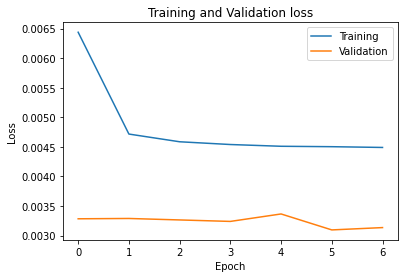

In [ ]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show

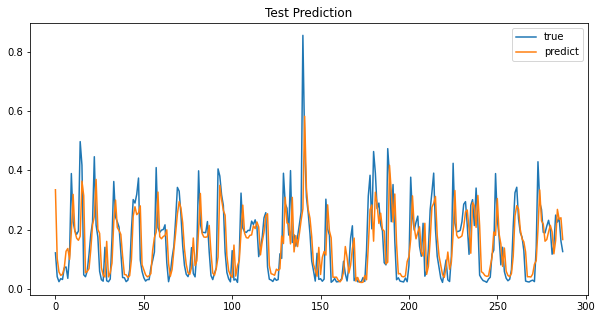

In [ ]:
# Buat prediksi dengan test_X set
y_hat = model.predict(test_X)
plt.figure(figsize=(10,5))
plt.plot(test_Y, label='true')
plt.plot(y_hat, label='predict')
plt.title('Test Prediction')
plt.legend()
plt.show()

In [ ]:
# Balikkan skala nilai prdeiksi ke nilai semula
y_hat_inverse = scaler.inverse_transform(y_hat.reshape(-1, 1))
test_Y_inverse = scaler.inverse_transform(test_Y.reshape(-1, 1))

In [ ]:
# Hitung skala data
min_value = df_resample.values.min()
max_value = df_resample.values.max()
data_scale = max_value - min_value
print('min_sum:', min_value)
print('max_sum:', max_value)
print(f'MAE < 10% skala data = {(0.1 * data_scale):.3f}')

min_sum: 0.12399999999999993
max_sum: 6.560533333333334
MAE < 10% skala data = 0.644


In [ ]:
# Hitung MAE
forecast = y_hat_inverse
actual = test_Y_inverse
errors = forecast - actual
mae = np.abs(errors).mean()
print(f'Test MAE: {mae:.2f}')

Test MAE: 0.40
